In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from scipy.stats import sem
from scipy.stats import stats

In [2]:
# read the crime data for the city of Manchester in August, 2018

file = ('Resources/final_manchester_crime_data.csv')
mc_pf = pd.read_csv(file)

mc_pf.head()

,Unnamed: 0,CrimeTS,Location,Type,Longitude,Latitude
0,0,2018-08-02 21:29:18,On or near Faraday Street,Violence and sexual offences,-2.125952,53.456924
1,1,2018-08-01 15:29:08,On or near Camborne Road,Violence and sexual offences,-2.445266,53.568947
2,2,2018-08-05 11:29:28,On or near Ashley Road,Criminal damage and arson,-2.354261,53.419073
3,3,2018-08-26 05:21:34,On or near Trust Road,Public order,-2.563494,53.536908
4,4,2018-08-16 01:16:35,On or near Back Elmwood Grove West,Violence and sexual offences,-2.199558,53.513226


# convert time data to datatime object

In [4]:
# split the time data into date and time
crime_date = [x.split()[0] for x in mc_pf['CrimeTS']]
crime_time = [x.split()[1] for x in mc_pf['CrimeTS']]
mc_pf['Crime Date'] = crime_date
mc_pf['Crime Time'] = crime_time

# structure the time and date data into python datetime object
from datetime import datetime
import time
crime_TS = [datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S") for date_str in mc_pf['CrimeTS']]
mc_pf['CrimeTS'] = crime_TS
mc_pf.head()


,Unnamed: 0,CrimeTS,Location,Type,Longitude,Latitude,Crime Date,Crime Time
0,0,2018-08-02 21:29:18,On or near Faraday Street,Violence and sexual offences,-2.125952,53.456924,2018-08-02,21:29:18
1,1,2018-08-01 15:29:08,On or near Camborne Road,Violence and sexual offences,-2.445266,53.568947,2018-08-01,15:29:08
2,2,2018-08-05 11:29:28,On or near Ashley Road,Criminal damage and arson,-2.354261,53.419073,2018-08-05,11:29:28
3,3,2018-08-26 05:21:34,On or near Trust Road,Public order,-2.563494,53.536908,2018-08-26,05:21:34
4,4,2018-08-16 01:16:35,On or near Back Elmwood Grove West,Violence and sexual offences,-2.199558,53.513226,2018-08-16,01:16:35


# Create DataFrame for home game, away game and off days

In [5]:
# The crime rate data on the days of home games

mc_home_game_1 = mc_pf.loc[mc_pf['Crime Date'] == '2018-08-10',  :]
mc_home_game_2 = mc_pf.loc[mc_pf['Crime Date'] == '2018-08-19',  :]
mc_home_game_3 = mc_pf.loc[mc_pf['Crime Date'] == '2018-08-27',  :]

mc_home_game = pd.concat([mc_home_game_1, mc_home_game_2, mc_home_game_3])

# save the home game crime data
mc_home_game.to_csv('Resources/final_manchester_crime_data_home_game.csv')

In [6]:
# The crime rate data on the days of guest games

mc_guest_game_1 = mc_pf.loc[mc_pf['Crime Date'] == '2018-08-12',  :]
mc_guest_game_2 = mc_pf.loc[mc_pf['Crime Date'] == '2018-08-19',  :]
mc_guest_game_3 = mc_pf.loc[mc_pf['Crime Date'] == '2018-08-25',  :]

mc_guest_game = pd.concat([mc_guest_game_1, mc_guest_game_2, mc_guest_game_3])

# save the guest game crime data
mc_guest_game.to_csv('Resources/final_manchester_crime_data_guest_game.csv')

In [7]:
# The crime rate data on the days without games

game_days = ['2018-08-10', '2018-08-12', '2018-08-19', '2018-08-25', '2018-08-27']
mc_off_game = mc_pf
for game_day in game_days:
    mc_off_game =  mc_off_game[mc_off_game['Crime Date'] != game_day]

# save the off game day crime data
mc_off_game.to_csv('Resources/final_manchester_crime_data_off_game.csv')



# Crime data on each day of August, 2018

In [8]:
# Group the data by crime date

grouped_date_mc_pf = mc_pf.groupby(['Crime Date'])

crime_counts = grouped_date_mc_pf['CrimeTS'].count()


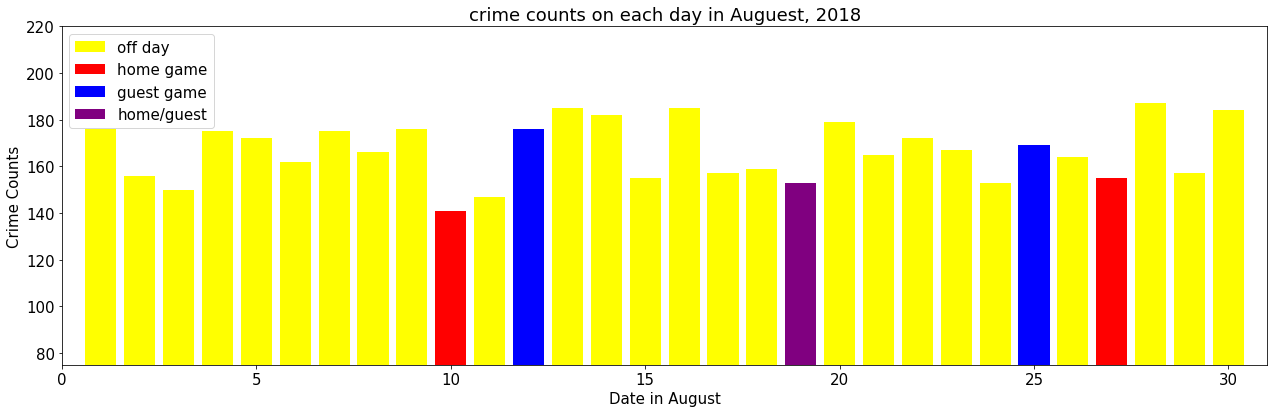

In [56]:
#plots for crime counts on each day in Auguest, 2018

time = np.arange(1, 31, 1)
fig = plt.figure()
fig.set_size_inches((18, 6))
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.size': 15})

# crimes on each day of August
plt.bar(time, crime_counts, color = 'yellow', label = 'off day')

# crimes on home game days
plt.bar([10, 27], (crime_counts[9], crime_counts[26]), color = 'red', label = 'home game' )

# crimes on away game days
plt.bar([12, 25], (crime_counts[11], crime_counts[24]), color = 'blue', label = 'guest game'  )

# crimes on home/away game days
plt.bar(19, crime_counts[18],  color = 'purple',  label = 'home/guest')

# labeling the figure
plt.xlim(0, 31)
plt.ylim(75, 220)
plt.title('crime counts on each day in Auguest, 2018')
plt.legend(loc = 'best')
plt.xlabel('Date in August')
plt.ylabel('Crime Counts')

plt.savefig('Images/august_crime.png')

* Home games were held on August 10, 19, and 27
* Away game were held on August 12, 19 and 25
* Home game for Manchester City and guest game for Mancehster United on August 19
* Crimes went down on home game days; however, the only day that crimes went down 

# Statitical analysis for crimes on home game, away game and off days

In [11]:
# Group the data by crime date based on data on home game days, guest game days, off days

# mean and sem for home game days
home_game_crime = mc_home_game.groupby(['Crime Date'])['CrimeTS'].count()

# mean and sem for guest game days
guest_game_crime = mc_guest_game.groupby(['Crime Date'])['CrimeTS'].count()

# mean and sem for off game days
off_game_crime = mc_off_game.groupby(['Crime Date'])['CrimeTS'].count()


In [12]:
# ANOVA for off, home and guest game day crime data
stats.f_oneway(home_game_crime, guest_game_crime, off_game_crime)

F_onewayResult(statistic=3.3578864556134604, pvalue=0.04929883940992602)

In [13]:
# p-value for home_game_crime and off_game_crime

home_t, home_p = stats.ttest_ind(home_game_crime, off_game_crime, equal_var = False )
home_p = round(home_p, 6)
home_p

0.02769

In [14]:
# p-value for guest_game_crime and off_game_crime

guest_t, guest_p = stats.ttest_ind(guest_game_crime, off_game_crime, equal_var = False )
guest_p = round(guest_p, 6)
guest_p

0.780108

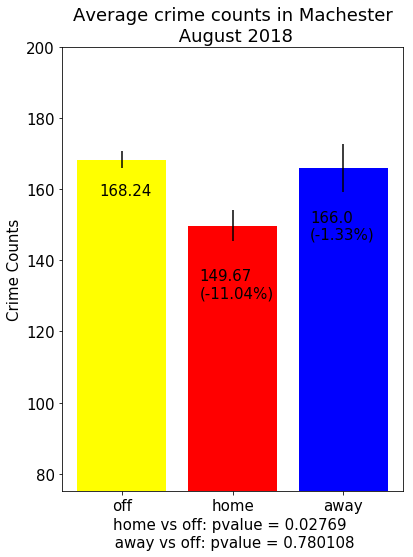

In [17]:
# plot the crime counts data accoring to data on home game days, guest game days, off days

fig = plt.figure()
fig.set_size_inches((6, 8))

rcParams.update({'font.size': 15})

mean_crime = [off_game_crime.mean(), home_game_crime.mean(), guest_game_crime.mean()]
sem_crime = [off_game_crime.sem(), home_game_crime.sem(), guest_game_crime.sem()]
color_crime = ['yellow', 'red', 'blue']


import matplotlib.pyplot as plt
plt.bar(x = [0, 1, 2], height = mean_crime, yerr = sem_crime,   color = color_crime )
home_percent_change = 100*(home_game_crime.mean()-off_game_crime.mean())/off_game_crime.mean()
guest_percent_change = 100*(guest_game_crime.mean()-off_game_crime.mean())/off_game_crime.mean()
plt.ylim(75, 200)
plt.ylabel('Crime Counts')
plt.xlabel(f'home vs off: pvalue = {home_p} \n away vs off: pvalue = {guest_p}')
plt.xticks([0.0, 1.0, 2.0], ['off', 'home', 'away'])
plt.text(-0.2, off_game_crime.mean()-10, f'{round(off_game_crime.mean(), 2)}')
plt.text(0.7, home_game_crime.mean()-20, f'{round(home_game_crime.mean(), 2)}\n({round(home_percent_change,2)}%)')
plt.text(1.7, guest_game_crime.mean()-20, f'{round(guest_game_crime.mean(), 2)}\n({round(guest_percent_change,2)}%)')
plt.title('Average crime counts in Machester\n August 2018')
plt.savefig("Images/crime_counts_general_comparison.png")



* The average crime on home game days (home) are 11.04% lower tha the crimes happened on the days without games (off)
* the p-value for average crime on home game (home) and no game (off) days is 0.02766 < 0.05 
* The p-value for average crime on away game (home) and no game (off) days is 0.780108 > 0.05, suggested that they are not statistically different.
* We will focus on the difference between home game and off days for further analysis
* The error bars indicate the stand error

# Analysis of crime subtypes

In [31]:
# list of crime types 
crime_type = ["Bicycle theft", "Burglary", "Criminal damage and arson", "Drugs", "Other crime", "Other theft", 
              "Possession of weapons", "Public order", "Robbery", "Shoplifting", "Theft from the person", 
              "Vehicle crime", "Violence and sexual offences"]


In [32]:
# analysis of crime by catogories, off days 

off_crime_type_counts = []
off_crime_type_sem = []
off_crime_type_std = []

# loop through types of crimes
off_game_crime_type = mc_off_game.groupby(['Crime Date','Type'])['CrimeTS'].count().reset_index()
for i in crime_type:
    j = off_game_crime_type.loc[off_game_crime_type["Type"] == i, :]
    off_crime_type_counts.append(j.mean())
    off_crime_type_sem.append(j.sem())
    off_crime_type_std.append(j.std())
 
# make the lists into numpy array
off_crime_type_counts = np.reshape(np.array(off_crime_type_counts), 13)
off_crime_type_sem = np.reshape(np.array(off_crime_type_sem), 13)
off_crime_type_std = np.reshape(np.array(off_crime_type_std), 13)

In [19]:
# analysis of crime by catogories, home games 

home_crime_type_counts = []
home_crime_type_sem = []
home_crime_type_std = []

# loop through types of crimes
home_game_crime_type = mc_home_game.groupby(['Crime Date','Type'])['CrimeTS'].count().reset_index()
for i in crime_type:
    j = home_game_crime_type.loc[home_game_crime_type["Type"] == i, :]
    home_crime_type_counts.append(j.mean())
    home_crime_type_sem.append(j.sem())
    home_crime_type_std.append(j.std())
    
# make the lists into numpy array   
home_crime_type_counts = np.reshape(np.array(home_crime_type_counts), 13)
home_crime_type_sem = np.reshape(np.array(home_crime_type_sem), 13)
home_crime_type_std = np.reshape(np.array(home_crime_type_std), 13)

In [33]:
# analysis of crime by catogories, away games 

guest_crime_type_counts = []
guest_crime_type_sem = []
guest_crime_type_std = []

# loop through types of crimes
guest_game_crime_type = mc_guest_game.groupby(['Crime Date','Type'])['CrimeTS'].count().reset_index()
for i in crime_type:
    j = guest_game_crime_type.loc[guest_game_crime_type["Type"] == i, :]
    guest_crime_type_counts.append(j.mean())
    guest_crime_type_sem.append(j.sem())
    guest_crime_type_std.append(j.std())

# make the lists into numpy array
guest_crime_type_counts = np.reshape(np.array(guest_crime_type_counts), 13)
guest_crime_type_sem = np.reshape(np.array(guest_crime_type_sem),13)
guest_crime_type_std = np.reshape(np.array(guest_crime_type_std),13)

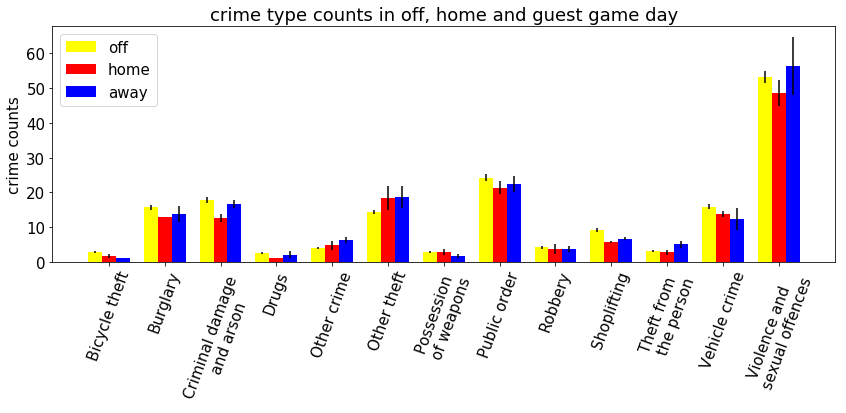

In [36]:
# creating plot

crime_types = ["Bicycle theft", "Burglary", "Criminal damage \n and arson", "Drugs", "Other crime", "Other theft", "Possession \nof weapons", "Public order", "Robbery", "Shoplifting", "Theft from \n the person", "Vehicle crime", "Violence and \n sexual offences"]
n_groups = 13
fig, ax = plt.subplots()
fig.set_size_inches((12, 6))
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8

# subtypes of crimes on off days
plt.bar(x = index, height = off_crime_type_counts, yerr = off_crime_type_sem, width = bar_width, 
                 color='yellow', label='off')

# subtypes of crimes on home game days
plt.bar(x = index + bar_width, height = home_crime_type_counts, yerr = home_crime_type_sem, width = bar_width, 
                 color='red', label='home')

# subtypes of crimes on away game days
plt.bar(x = index + 2*bar_width, height = guest_crime_type_counts, yerr = guest_crime_type_sem, width = bar_width,
                 color='blue', label='away')


#labeling the plot
plt.ylabel('crime counts')
plt.title('crime type counts in off, home and guest game day')
plt.xticks(index + bar_width, crime_types, rotation = 70)
plt.legend()

plt.tight_layout()

plt.savefig("Images/crime_type_comparison.png")

# Crime subtypes increasing or decreasing on home game days

In [23]:
# find the types of crimes which are significant different between off- and home-game days

from scipy.stats import ttest_ind_from_stats

# store the index, p_value and crime type in a list 
diff_off_home = []

# use individual t-test to determine the crimes which are statistical different in home-game days
for i in np.arange(13):
    t, p = ttest_ind_from_stats(mean1 = off_crime_type_counts[i], std1 = off_crime_type_std[i], nobs1 = 25, 
                                mean2 = home_crime_type_counts[i], std2 = home_crime_type_std[i], nobs2 =  3)
    if p <0.05:
        diff_off_home.append([i, p, crime_type[i]])

              
diff_off_home            

[[2, 0.04560405309282813, 'Criminal damage and arson'],
 [3, 0.029946933418083146, 'Drugs'],
 [5, 0.04590376712949329, 'Other theft'],
 [9, 0.04940925008809658, 'Shoplifting']]

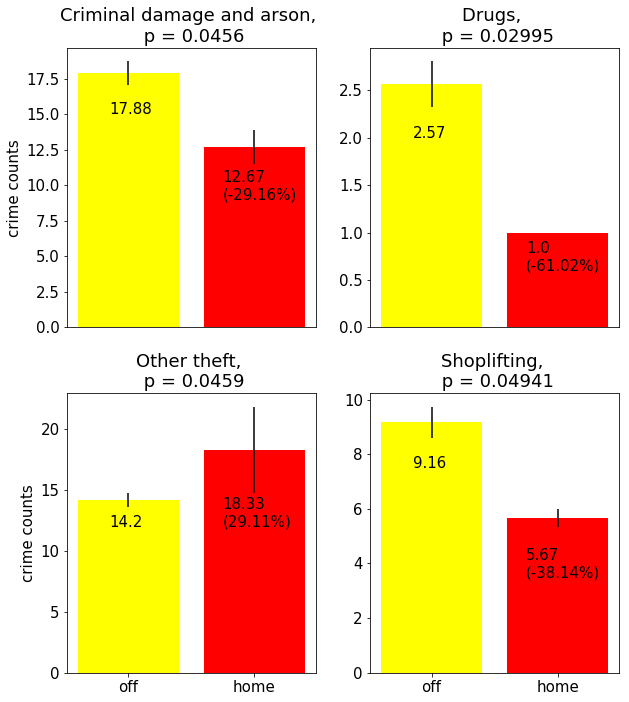

In [24]:
# plot the crime changes which are significant different between the off day and game day

f, ax = plt.subplots(2, 2)
f.set_size_inches((9, 10))
x = np.arange(2)
day_categories = [off_crime_type_counts, home_crime_type_counts]
day_categories_sem = [off_crime_type_sem, home_crime_type_sem]
colors = ['yellow', 'red']

axes = (ax[0, 0], ax[0, 1], ax[1, 0], ax[1, 1])
types = (diff_off_home[0][2], diff_off_home[1][2], diff_off_home[2][2], diff_off_home[3][2])
p_val = (round(diff_off_home[0][1], 5), round(diff_off_home[1][1], 5), round(diff_off_home[2][1], 5), round(diff_off_home[3][1], 5))
type_index = (diff_off_home[0][0], diff_off_home[1][0], diff_off_home[2][0], diff_off_home[3][0])

# calculate the percentage change for each crime, off days vs home-game days
percent_type = []

for i in type_index:
    j = round(100*(home_crime_type_counts[i] - off_crime_type_counts[i])/off_crime_type_counts[i], 2)
    percent_type.append(j)
    
# plot the bar chart for each crime,off days vs home-game days   
for i in np.arange(len(axes)):
    axes[i].bar(x = x, height = [cat[type_index[i]] for cat in day_categories], 
                         yerr = [cat_sem[type_index[i]] for cat_sem in day_categories_sem], color = colors )
    axes[i].set_title(f'{types[i]}, \n p = {p_val[i]}')
    axes[i].set_xticks([])
    
# labeling the plots

axes[0].set_ylabel('crime counts')
axes[2].set_ylabel('crime counts')

axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['off', 'home'])

axes[3].set_xticks([0, 1])
axes[3].set_xticklabels(['off', 'home'])

axes[0].text(-0.15, 15, f'{off_crime_type_counts[type_index[0]]}')
axes[0].text(0.75, 9, f'{round(home_crime_type_counts[type_index[0]], 2)}\n({percent_type[0]}%)')

axes[1].text(-0.15, 2, f'{round(off_crime_type_counts[type_index[1]], 2)}')
axes[1].text(0.75, 0.6, f'{round(home_crime_type_counts[type_index[1]], 2)}\n({percent_type[1]}%)')

axes[2].text(-0.15, 12, f'{round(off_crime_type_counts[type_index[2]], 2)}')
axes[2].text(0.75, 12, f'{round(home_crime_type_counts[type_index[2]], 2)}\n({percent_type[2]}%)')

axes[3].text(-0.15, 7.5, f'{round(off_crime_type_counts[type_index[3]], 2)}')
axes[3].text(0.75, 3.5, f'{round(home_crime_type_counts[type_index[3]], 2)}\n({percent_type[3]}%)')
plt.savefig('Images/subtypes_crime_home.png')


* Four types of crimes are statistically different between home game (home) and on game (off) days
* On average, less Criminal and Arson (-29.16%), Drugs (-61.02%), and Shoplifting (-38.14%) on game days 
* On average, more Other Theft (29.11%) on game day. 
* The error bars indicate the stand error

# Crime subtypes increasing or decreasing on home game days

In [25]:
# finding the subtypes which are statiticallly different between away-game days and off days

diff_off_guest = []

for i in np.arange(13):
    t, p = ttest_ind_from_stats(mean1 = off_crime_type_counts[i], std1 = off_crime_type_std[i], nobs1 = 25, 
                                mean2 = guest_crime_type_counts[i], std2 = guest_crime_type_std[i], nobs2 =  3)
    if p <0.05:
        diff_off_guest.append([i, p, crime_type[i]])

              
diff_off_guest       

[[4, 0.007214967125526608, 'Other crime'],
 [5, 0.0280421291058585, 'Other theft']]

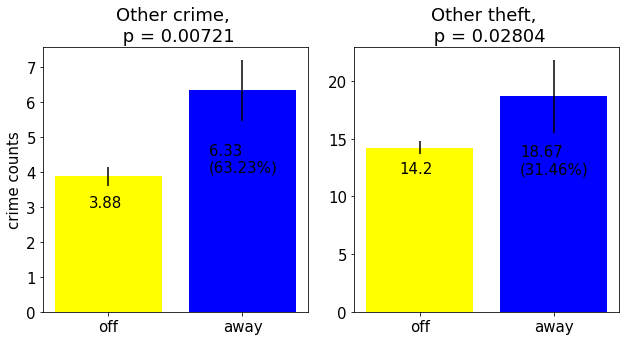

In [40]:
# plot the crime changes which are significant different between the off day and game day

f, ax = plt.subplots(1, 2)
f.set_size_inches((9, 5))
x = np.arange(2)
day_categories = [off_crime_type_counts, guest_crime_type_counts]
day_categories_sem = [off_crime_type_sem, guest_crime_type_sem]
colors = ['yellow', 'blue']

# subplots
axes = (ax[0], ax[1])
types = (diff_off_guest[0][2], diff_off_guest[1][2])
p_val = (round(diff_off_guest[0][1], 5), round(diff_off_guest[1][1], 5))
type_index = (diff_off_guest[0][0], diff_off_guest[1][0])

# calculate the percentage change for each crime, off days vs home-game days

g_percent_type = []

for i in type_index:
    j = round(100*(guest_crime_type_counts[i] - off_crime_type_counts[i])/off_crime_type_counts[i], 2)
    g_percent_type.append(j)
    
# plot the bar chart for each crime,off days vs home-game days   
for i in np.arange(len(axes)):
    axes[i].bar(x = x, height = [cat[type_index[i]] for cat in day_categories], 
                         yerr = [cat_sem[type_index[i]] for cat_sem in day_categories_sem], color = colors )
    axes[i].set_title(f'{types[i]}, \n p = {p_val[i]}')
    axes[i].set_xticks([])
    

# labeling the plots

axes[0].set_ylabel('crime counts')


axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['off', 'away'])

axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['off', 'away'])

axes[0].text(-0.15, 3, f'{off_crime_type_counts[type_index[0]]}')
axes[0].text(0.75, 4, f'{round(guest_crime_type_counts[type_index[0]], 2)}\n({g_percent_type[0]}%)')

axes[1].text(-0.15, 12, f'{round(off_crime_type_counts[type_index[1]], 2)}')
axes[1].text(0.75, 12, f'{round(guest_crime_type_counts[type_index[1]], 2)}\n({g_percent_type[1]}%)')


plt.savefig('Images/subtypes_crime_guest.png')


* Two types of crimes are statistically different between away game (away) and on game (off) days
* On average, more Other crime(63.23%)and Other theft (31.46%) on away game days 
* The error bars indicate the stand error

# gmap analysis of crime data

In [41]:
# include the day  in the data frame
crime_day = [ct.day for ct in mc_pf['CrimeTS']]
mc_pf_day = mc_pf
mc_pf_day['Crime Day'] = crime_day
mc_pf_day.head()

,Unnamed: 0,CrimeTS,Location,Type,Longitude,Latitude,Crime Date,Crime Time,Crime Day
0,0,2018-08-02 21:29:18,On or near Faraday Street,Violence and sexual offences,-2.125952,53.456924,2018-08-02,21:29:18,2
1,1,2018-08-01 15:29:08,On or near Camborne Road,Violence and sexual offences,-2.445266,53.568947,2018-08-01,15:29:08,1
2,2,2018-08-05 11:29:28,On or near Ashley Road,Criminal damage and arson,-2.354261,53.419073,2018-08-05,11:29:28,5
3,3,2018-08-26 05:21:34,On or near Trust Road,Public order,-2.563494,53.536908,2018-08-26,05:21:34,26
4,4,2018-08-16 01:16:35,On or near Back Elmwood Grove West,Violence and sexual offences,-2.199558,53.513226,2018-08-16,01:16:35,16


# heatmap for crimes on home game, away game and off game days

In [42]:
# Crime Heatmap for off day

import gmaps
from config import gkey


# lat and lon of the crime location
manchester_coordinates = (53.4808, -2.2426)
#off_day_data = mc_off_game[mc_off_game['CrimeDay'] = 1]
off_day_location = mc_off_game[['Latitude', 'Longitude']]

# lat and lon of the two statiums
etihad_stadium = [53.4831, -2.2004,]
old_trafford = [53.4631, -2.2913,]
marker_locations = [etihad_stadium, old_trafford]

gmaps.configure(api_key=gkey)
fig = gmaps.figure(map_type='ROADMAP',center=manchester_coordinates, zoom_level=10)
heatmap_layer = gmaps.heatmap_layer(off_day_location)
markers = gmaps.marker_layer(marker_locations)
fig.add_layer(markers)
fig.add_layer(heatmap_layer)


fig

Figure(layout=FigureLayout(height='420px'))

In [43]:
# Crime Heatmap for home game 

import gmaps
from config import gkey

# lat and lon of the crime location
manchester_coordinates = (53.4808, -2.2426)
game_day_location = mc_home_game[['Latitude', 'Longitude']]

gmaps.configure(api_key=gkey)
fig = gmaps.figure(map_type='ROADMAP',center=manchester_coordinates, zoom_level=10)
heatmap_layer = gmaps.heatmap_layer(game_day_location)
markers = gmaps.marker_layer(marker_locations)
fig.add_layer(markers)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [44]:
# Crime Heatmap for guest game 

# lat and lon of the crime location
guest_day_location = mc_guest_game[['Latitude', 'Longitude',]]

gmaps.configure(api_key=gkey)
fig = gmaps.figure(map_type='ROADMAP',center=manchester_coordinates, zoom_level=10)
heatmap_layer = gmaps.heatmap_layer(guest_day_location)
markers = gmaps.marker_layer(marker_locations)
fig.add_layer(markers)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [45]:
# print categories of crimes 

mc_home_game['Type'].unique()

array(['Violence and sexual offences', 'Burglary', 'Other theft',
       'Criminal damage and arson', 'Public order', 'Shoplifting',
       'Vehicle crime', 'Other crime', 'Theft from the person',
       'Bicycle theft', 'Drugs', 'Possession of weapons', 'Robbery'],
      dtype=object)

In [46]:
# Crime maps for home game, by category

import gmaps
from config import gkey

# lat and lon of the crime location
game_day_location = mc_home_game[mc_home_game['Type'] == 'Drugs' ][['Latitude', 'Longitude']]

gmaps.configure(api_key=gkey)
fig = gmaps.figure(map_type='ROADMAP',center=manchester_coordinates, zoom_level=10)
symbol_layer = gmaps.symbol_layer(game_day_location, fill_color='red', stroke_color='green', scale=3)
markers = gmaps.marker_layer(marker_locations)
fig.add_layer(markers)
fig.add_layer(symbol_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [47]:
# Crime maps for guest game day, by category

import gmaps
from config import gkey

# lat and lon of the crime location
game_day_location = mc_guest_game[mc_guest_game['Type'] == 'Robbery' ][['Latitude', 'Longitude']]

gmaps.configure(api_key=gkey)
fig = gmaps.figure(map_type='ROADMAP',center=manchester_coordinates, zoom_level=10)
symbol_layer = gmaps.symbol_layer(game_day_location, fill_color='red', stroke_color='green', scale=3)
markers = gmaps.marker_layer(marker_locations)
fig.add_layer(markers)
fig.add_layer(symbol_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [48]:
# Crime Heatmap, by day
import gmaps
from config import gkey


# lat and lon of the crime location
manchester_coordinates = (53.4808, -2.2426)

# location for each crime
day_location = mc_pf_day[mc_pf_day['Crime Day'] ==15][['Latitude', 'Longitude']]

# lat and lon of the two statiums
etihad_stadium = [53.4831, -2.2004]
old_trafford = [53.4631, -2.2913]
marker_locations = [etihad_stadium, old_trafford]

gmaps.configure(api_key=gkey)
fig = gmaps.figure(map_type='ROADMAP',center=manchester_coordinates, zoom_level=12)
symbol_layer = gmaps.symbol_layer(day_location, fill_color='red', stroke_color='green', scale=3)
markers = gmaps.marker_layer(marker_locations)
fig.add_layer(markers)
fig.add_layer(symbol_layer)
fig


Figure(layout=FigureLayout(height='420px'))

* We found a lot of crimes commited at the center of the city.
* Though both stadium are not too far away from the center of the city (about 3 km), there are not a lot of crimes around the statium on both game days and off days (see the heatmaps)
* We will further analyze the crimes committed at the center of the city, around both stadium on home game days and off days

# Crimes committed within 2km of the stadium at the home games

In [49]:
# crimes around 2km radius of the stadium at the game day
# the Machester United stadium

old_trafford = [53.4631, -2.2913,] # Machester United Stadium 

# distance between crime location and the stadium
import geopy.distance

def crime_dis(lat, lon, stadium):
    coords_1 = (lat, lon)
    coords_2 = (stadium)
    return geopy.distance.geodesic(coords_1, coords_2).km

crime_mu = [] #  list for every day crime around the Machester United stadium 

for i in np.arange(1, 31, 1):
    j = 0
    df = mc_pf_day[mc_pf_day['Crime Day'] == i]
    df = pd.DataFrame(df)
    for index, row in df.iterrows():
        if crime_dis(row['Latitude'], row['Longitude'], old_trafford) <= 2:
            j += 1
    crime_mu.append(j)



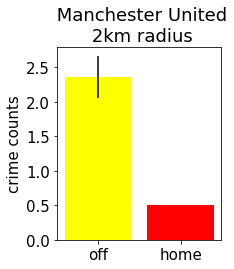

In [107]:
# Machester Uniter crime around the Machester United stadium, home game Auguset 10, 27

crime_mu_home = (crime_mu[9] + crime_mu[26])/2
crime_mu_off = np.array(crime_mu)
crime_mu_off = np.delete(crime_mu_off, (9, 26))

# bar plot for crime cound winthin 2km of the Machester United stadium, home game Auguset 10, 27

fig = plt.figure()
fig.set_size_inches((3.5, 4))


plt.bar(0, crime_mu_off.mean(), yerr = sem(crime_mu_off), color = 'yellow')
plt.bar(1, crime_mu_home, color = 'red')
plt.title(' Manchester United\n 2km radius')
plt.ylabel('crime counts')
plt.xticks([0, 1], ['off', 'home'])
rcParams.update({'figure.autolayout': True})
plt.savefig('Images/Manchester_united_2km.png')

* Even on off game day, there are not a lot of crimes committed around the stadium (2km range)
* On home game day, less crimes are committed around the stadium
* The error bars indicate the stand error

In [91]:
# crimes around 2km radius of the stadium at the game day
# the Machester City stadium
etihad_stadium = [53.4831, -2.2004]

crime_mc = [] #  list for every day crime around the Machester City stadium 

for i in np.arange(1, 31, 1):
    j = 0
    df = mc_pf_day[mc_pf_day['Crime Day'] == i]
    df = pd.DataFrame(df)
    for index, row in df.iterrows():
        if crime_dis(row['Latitude'], row['Longitude'], etihad_stadium) <= 2:
            j += 1
    crime_mc.append(j)


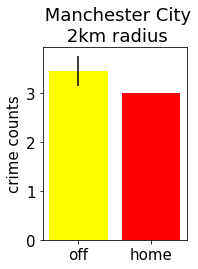

In [92]:
# Machester Uniter crime around the Machester United stadium, home game Auguset 10, 27

crime_mc_home = crime_mc[18] 
crime_mc_off = np.array(crime_mc)
crime_mc_off = np.delete(crime_mc_off, 18)

# bar plot for crime cound winthin 2km of the Machester city stadium, home game Auguset 10, 27

fig = plt.figure()
fig.set_size_inches((3, 4))


plt.bar(0, crime_mc_off.mean(), yerr = sem(crime_mc_off), color = 'yellow')
plt.bar(1, crime_mc_home, color = 'red')
plt.title(' Manchester City\n 2km radius')
plt.ylabel('crime counts')
plt.xticks([0, 1], ['off', 'home'])
rcParams.update({'figure.autolayout': True})
plt.savefig('Images/Manchester_city_2km.png')

* More game are committed around the Manchester City Stadium then around Manchester United Stadium (2km range)
* On home game day, the crimes were not going down around the stadium
* The error bars indicate the stand error

# Crimes committed within 3 km of the center of the city of Manchester

In [82]:
# crimes around 3km radius of the stadium at the game day
# the Machester United stadium

manchester_coordinates = [53.4808, -2.2426] # center of the city of Machester 

# distance between crime location and center of the city

crime_m_center = [] #  list for every day crime around the center of the city of Manchester

for i in np.arange(1, 31, 1):
    j = 0
    df = mc_pf_day[mc_pf_day['Crime Day'] == i]
    df = pd.DataFrame(df)
    for index, row in df.iterrows():
        if crime_dis(row['Latitude'], row['Longitude'], manchester_coordinates) <= 3:
            j += 1
    crime_m_center.append(j)

# plot the crime around the center of city on each day


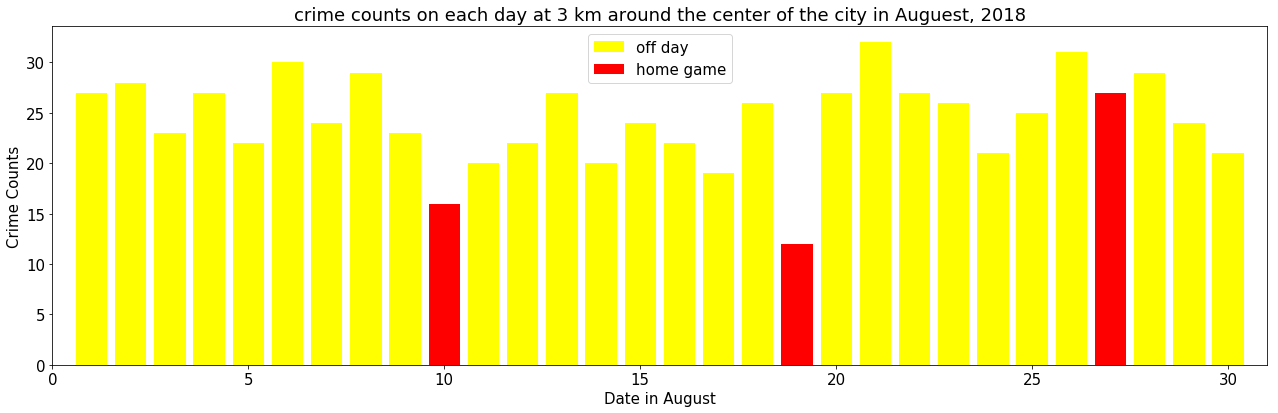

In [84]:
# plot the crime around the center of city on each day
time = np.arange(1, 31, 1)
fig = plt.figure()
fig.set_size_inches((18, 6))
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.size': 15})

# crimes on each day of August
plt.bar(time,  crime_m_center, color = 'yellow', label = 'off day')

# crimes on home game days
plt.bar([10, 19, 27], ( crime_m_center[9], crime_m_center[18], crime_m_center[26]), color = 'red', label = 'home game' )


# labeling the figure
plt.xlim(0, 31)
plt.title('crime counts on each day at 3 km around the center of the city in Auguest, 2018')
plt.legend(loc = 'best')
plt.xlabel('Date in August')
plt.ylabel('Crime Counts')

plt.savefig('Images/august_crime_city_center.png')

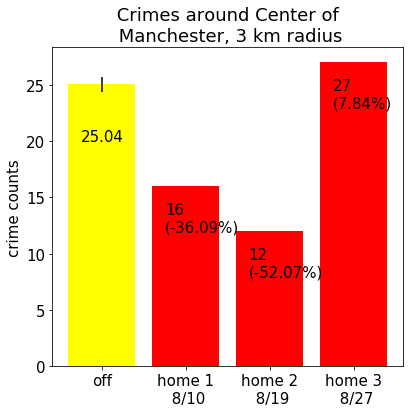

In [94]:
# plot the bar chart for off-game days average and for each home game day 
# data for off game days
crime_m_center_off = np.array(crime_m_center)
crime_m_center_off = np.delete(crime_m_center, (9, 18, 26))

# home game on August 10, 19, and 27
home_1 = crime_m_center[9]
home_2 = crime_m_center[18]
home_3 = crime_m_center[26]
home_center = [home_1, home_2, home_3]
home_center_percentage = [round(100*(i-crime_m_center_off.mean())/crime_m_center_off.mean(), 2) for i in home_center]

fig = plt.figure()
fig.set_size_inches((6, 6))

#labeling the plot
plt.bar(0, crime_m_center_off.mean(), yerr = sem(crime_m_center_off), color = 'yellow')
plt.bar([1,2,3],  home_center, color = 'red')
plt.title(' Crimes around Center of \n Manchester, 3 km radius')
plt.ylabel('crime counts')
plt.xticks([0, 1, 2, 3], ['off', 'home 1\n 8/10', 'home 2\n 8/19', 'home 3\n 8/27'])

plt.text(-0.25, 20, f'{round(crime_m_center_off.mean(), 2)}')
plt.text(0.75, 12, f'{home_1}\n({home_center_percentage[0]}%)')
plt.text(1.75, 8, f'{home_2}\n({home_center_percentage[1]}%)')
plt.text(2.75, 23, f'{home_3}\n({home_center_percentage[2]}%)')

rcParams.update({'figure.autolayout': True})
plt.savefig('Images/Center_of_Manchester_3km.png')


* Crime number at the center of the city went down on 8/10 and 8/19, but went up on8/27
* 8/27/2018 is also a National Holiday for England, so the increase might come from effects of national holiday activities.
* The lowest crime counts at the center of the city in August was on 8/19, when both home game (for Manchester City) and away game(for Manchester United) were held. 
* The error bars indicate the stand error

# Analysis of crimes on home day by hour
 * game time for the home game
   * 8/10/2018 : 8pm -10pm, Manchester United, Old Trafford stadium
   * 8/19/2018 : 1:30 pm to 3:30 pm, Manchester City, Etihad stadium
   * 8/27/2018 : 8pm -10pm, Manchester United, Old Trafford stadium

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


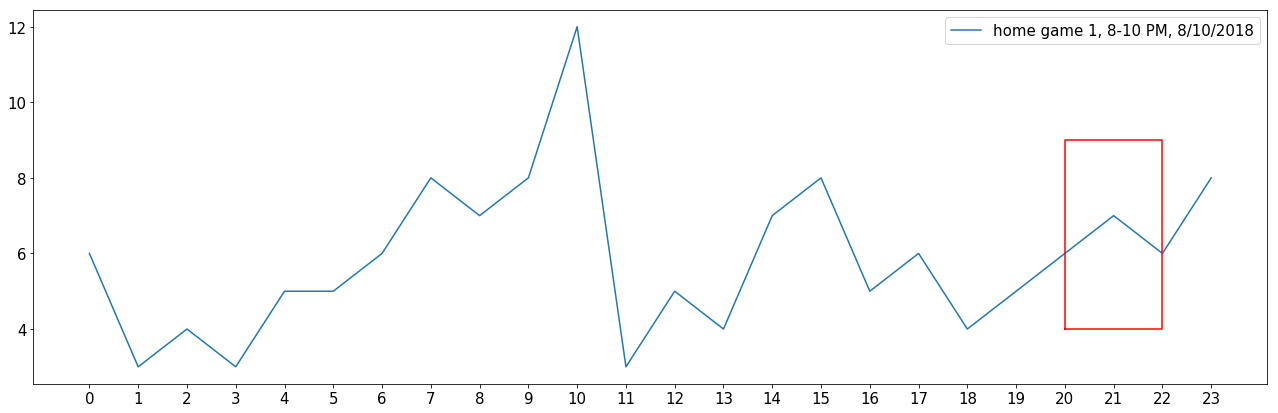

In [100]:
# crime by hour, 8/10/2018  Manchester United home game

mc_home_game_1 = mc_pf.loc[mc_pf['Crime Date'] == '2018-08-10',  :]
crime_hour = [ct.hour for ct in mc_home_game_1['CrimeTS']]
mc_home_game_1['Crime Hour'] = crime_hour
crime_by_hour =mc_home_game_1.groupby(['Crime Hour'])['CrimeTS'].count()

# plot the crimes by hour
fig = plt.figure()
fig.set_size_inches((18, 6))
plt.plot(np.arange(24), crime_by_hour, label = 'home game 1, 8-10 PM, 8/10/2018')

# labeling the game time
plt.plot([20, 20, 22, 22, 20],[4, 9, 9, 4, 4], color = 'red')

# labeling the plot
plt.xticks(np.arange(24))
plt.legend(loc = 'upper right')
plt.savefig('Images/crime_by_hour_day1.png')

* crime counts on the day of home game 1, 8/10/2018, the red box labeled the game time

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


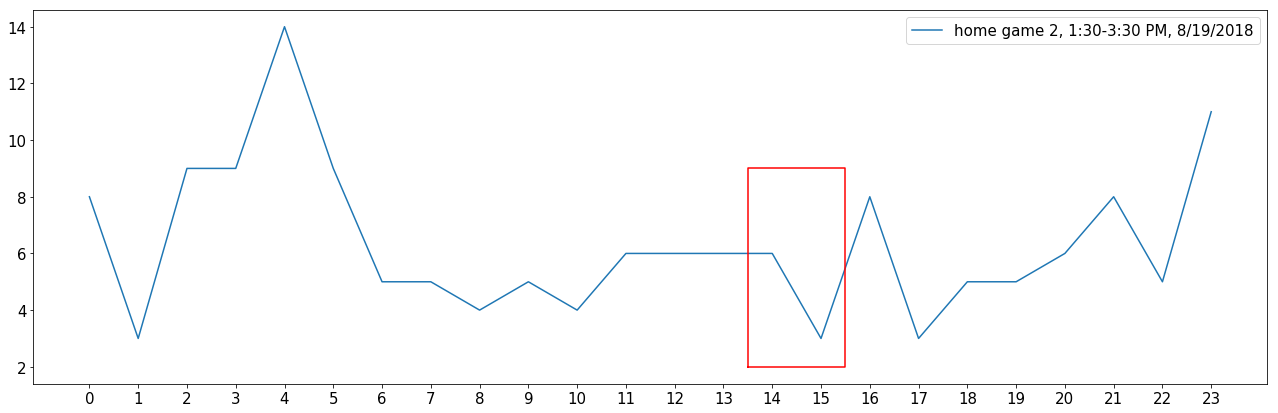

In [103]:
# crime by hour, 8/19/2018  Manchester City home game

mc_home_game_2 = mc_pf.loc[mc_pf['Crime Date'] == '2018-08-19',  :]
crime_hour = [ct.hour for ct in mc_home_game_2['CrimeTS']]
mc_home_game_2['Crime Hour'] = crime_hour
crime_by_hour =mc_home_game_2.groupby(['Crime Hour'])['CrimeTS'].count()

# plot the crimes by hour
fig = plt.figure()
fig.set_size_inches((18, 6))
plt.plot(np.arange(24), crime_by_hour, label = 'home game 2, 1:30-3:30 PM, 8/19/2018')

# labeling the game time
plt.plot([13.5, 13.5, 15.5, 15.5, 13.5],[2, 9, 9, 2, 2], color = 'red')

# labeling the plot
plt.xticks(np.arange(24))
plt.legend(loc = 'upper right')
plt.savefig('Images/crime_by_hour_day2.png')

* crime counts on the day of home game 2, 8/19/2018, the red box labeled the game time

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


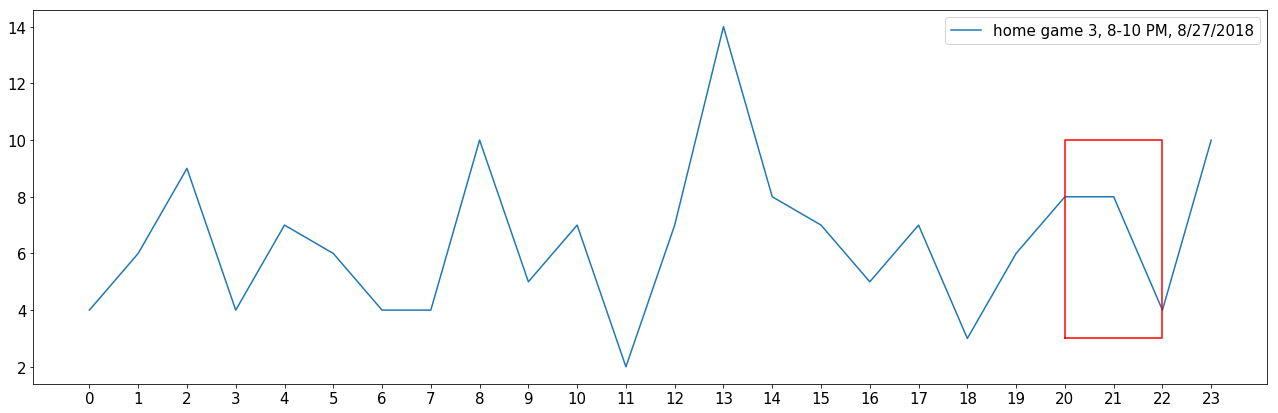

In [105]:
# crime by hour, 8/27/2018  Manchester United home game

mc_home_game_3 = mc_pf.loc[mc_pf['Crime Date'] == '2018-08-27',  :]
crime_hour = [ct.hour for ct in mc_home_game_3['CrimeTS']]
mc_home_game_3['Crime Hour'] = crime_hour
crime_by_hour =mc_home_game_3.groupby(['Crime Hour'])['CrimeTS'].count()

# plot the crimes by hour
fig = plt.figure()
fig.set_size_inches((18, 6))
plt.plot(np.arange(24), crime_by_hour, label = 'home game 3, 8-10 PM, 8/27/2018')

# labeling the game time
plt.plot([20, 20, 22, 22, 20],[3, 10, 10, 3, 3], color = 'red')

#labeling and saving the plot
plt.xticks(np.arange(24))
plt.legend(loc = 'upper right')
plt.savefig('Images/crime_by_hour_day3.png')

* crime counts on the day of home game 3, 8/27/2018, the red box labeled the game time
* In all three home games we found that the crime reports went down after the half-time of the game.